In [2]:
%pylab inline
from datetime import date
from datetime import datetime
import os
import pandas as pd
from sklearn.neural_network import MLPRegressor

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#Funciones para crear matrices de entrenaminto y pruebas

In [3]:
def train_X_Y(dias, precios, d_inicial,num_samples,num_features):    ##d_inicial : 0 a 2508
    ##dias: vector de dia de la semana para cada dia (L=1...V=5)
    ##precios: vector de pecios para cada dia
    ##d_inicial: Primer dia del entrenamiento (0 a 2508) es num_features-1 dias antes que el primer Y de entrenamiento 
    ##num_samples: Número de muestras para entrenar 
    ##num_features: Número de parametros de entrenamiento (1+ número de dias con que se predice el precio)
    
    
    
    num_dias = num_features-1
   
    dias = dias[d_inicial+num_dias:d_inicial+num_dias+num_samples]
    dias = dias.reshape(len(dias),1)
    
    pr=precios[d_inicial:d_inicial+num_samples]
    
    for i in range(d_inicial+1,d_inicial+num_dias):
        m = precios[i:i+num_samples]
        pr =  np.column_stack((pr,m))
            
    X = np.column_stack((pr,dias))
             
    Y = precios[d_inicial+num_dias:d_inicial+num_dias+num_samples]
    
    assert (X.shape == (num_samples, num_features))
    assert (Y.shape == (num_samples,))
    
    train = {"X": X,
                "Y": Y
            }
    
    return train



def test_X_Y(dias, precios, d_inicial,num_samples,num_features):
    test = train_X_Y(dias, precios, d_inicial,num_samples,num_features)
    
    return test

In [ ]:
## Poblando datos

In [4]:
datos_csv = os.path.join( '.','COLCAP.csv')
datos_pd = pd.read_csv(datos_csv, sep = ',',
                encoding='latin-1', parse_dates =[0], infer_datetime_format= True)

In [5]:
a=datos_pd["Fecha (dd/mm/aaaa)"]

dias = []

for i in range(len(a)):
    d = a[i].weekday() + 1
    dias.append(d)
    
d = np.array(dias)

In [6]:
b = datos_pd["Valor COLCAP"]
b = np.array(b)
d
for i in range(len(b)):
    b[i] = b[i].replace(',',"")


p=np.array(b, dtype= np.float64)

In [ ]:
## Prueba

In [7]:
#Definición de matrices de entreno
train=train_X_Y(d,p,700,1600,7)

In [8]:
#Definición de matrices de prueba
test=test_X_Y(d,p,2450,50,7)

In [26]:
#Entreno del sistema
rg= None
best = 0
for i in range(30):
    r = MLPRegressor(hidden_layer_sizes=(60,10), max_iter= 200, activation="relu",shuffle= False, solver= "adam", warm_start=False)
    r.fit(train["X"],train["Y"])
    b= r.score(test["X"], test["Y"])
    
    
    
    if best<b:
        rg = r
        best = b
        print(b)
        

0.726037663766
0.732204126626
0.739434136742
0.780554657418
0.804775446003


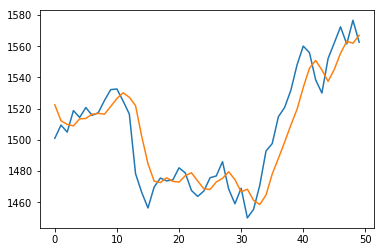

El R^2 del entreno es: 0.992381734831
El R^2 de la prueba es: 0.804775446003


In [27]:
#Grafica de predicción y real
plt.plot(test["Y"])
plt.plot(rg.predict(test["X"]))
score_train = rg.score(train["X"], train["Y"])
score_test = rg.score(test["X"], test["Y"])
plt.show()
print("El R^2 del entreno es: " + str(score_train))
print("El R^2 de la prueba es: " + str(score_test))

In [ ]:
#Prueba del modelo
rg.score(train["X"], train["Y"])

In [13]:
rg.score(test["X"], test["Y"])

0.70884869498597247

In [30]:
a=0
conf = np.array(['70,5'])
rep = np.array([1])
for k in range(50):
    mayor = 0
    m=""
    for i in range (10,110,10):
        for j in range (1,11):

            with warnings.catch_warnings(record=True) as w:
                warnings.simplefilter("always") 
                rg = MLPRegressor(hidden_layer_sizes=(i,j), max_iter= 200, activation="relu",shuffle= False, solver= "adam")
                rg.fit(train["X"],train["Y"])

            if w==[]:
                a = rg.score(test["X"], test["Y"])

            if a>mayor:
                mayor = a
                m = str(i)+ ","+str(j) 
    
    l = sum(conf == m)
    
    if l>0:
        temp=-1
        for s in range(len(conf)):
            if conf[s] == m:
                temp=s
            
        rep[s] = rep[s]+1
        
        
    else:
        conf = np.append(conf,m)
        rep = np.append(rep,1)
        
    if k in range(5,55,5):
        print(str(k))

5
10
15
20
25
30
35
40
45


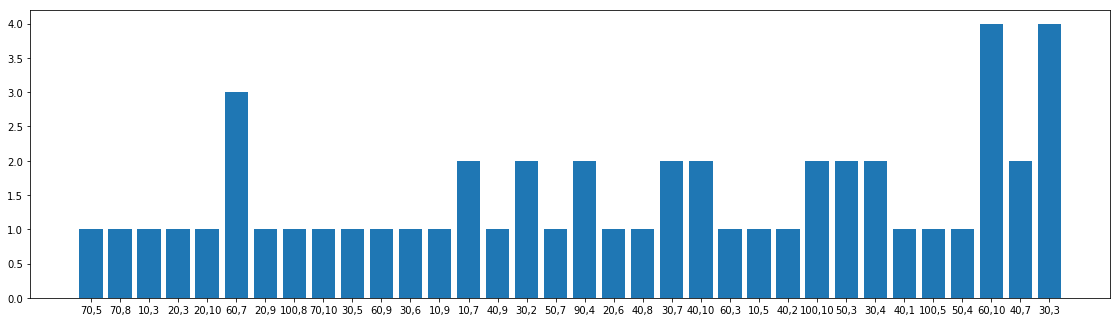

TypeError: imsave() missing 1 required positional argument: 'arr'

In [45]:
x = np.arange(1,len(conf)+1)
plt.bar(x,rep,tick_label=conf)
plt.plot()
plt.subplots_adjust(left=0.5, bottom=1, right=3, top=2)
plt.show()
plt.imsave("Results.jpg")

In [ ]:
plt.imshow(puntajes, cmap=cm.ocean, extent=(0,10,0.5,100))
plt.colorbar()
plt.show()

In [ ]:
## 70,5; 100,4 ha demostrado se robusto

100,4: 0.875152938321

80,5: 0.906159720869
40,2: 0.87019985029

40,5: 0.92095431876

10,8: 0.902660282298





10,9: 0.912546525051

10,10: 0.898967559595

10,10: 0.912162930144

100,5: 0.894026533104

40,5: 0.896936773488


In [ ]:
k = np.array([])
np.append(k,"1")